In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Establish domain knowledge:
https://ultimatetitanic.com/

Time of sinking: 2:20am. Struck iceberg at 11:40pm.
20 lifeboats could only take 1178 people but she had about 2223 people on board during sinking. Only 710 people escaped in lifeboats. 1514 people died in icy waters. Mainly consist of men who offered space to woman and children. Mainly second class men perished (90%).

First and second class had easy access to lifeboats. Much harder for third class. Corridors from lower sections of ship difficult to navigate and hard to make way to lifeboats. Some gates seperating third class section from other areas were locked. Lifeboats supposed to be lowered with woman and children from boat deck and subsequently pick up F-G deck woman and children from open gangways. No boat drill or training for seamen mean boats were lowered without stopping.Lorraine Allison, two year old girl, only first and second class child to perish, compared to 53 of 76 travelling in third.

AT 10pm, lights in public rooms of second and third class passengers put out to encourage passengers to head to bed, whilst drinks, cigars and conversations continued for those in first class.
Blatent class divison though still offered the most luxurious way for both higher class and lower class to cross the Atlantic.
Lifeboats stored on uppermost 'Boat' deck where first and second class passengers could access.
Third class passengers could access 'Bridge' deck which was below 'Boat' deck which was shared with cargo and equipment.
39 private suites: 30 on Bridge deck and 9 on Shelter deck. All had up to five different rooms: 2 bedrooms, 2 wardrobe rooms, and a bathroom

First class held 350 cheaper standard cabins with single beds.
Second class accomodation found over seven decks, with exits either by second class stairway or electric elevator which ran up and down all seven decks.
Second class accomdation was provided in either two or four berth rooms. Maximum of 550 passengers could be accomodated. Slept in berths built into cabin walls.

Third class much less luxurious than second class.
Over 1000 third class passengers on Titanic with rooms mainly comprising of two to six berth rooms. Only 84 two berth cabins on board. Slept on bunk beds in crowded quarters at six to a narrow cabin. Two bathtubs for 710 passengers; one for men and one for women!

Crew accomodation similar to third class. Simply place to sleep and read a book for a few hours as every sailing day was a work day.
Engine room staff housed on starboard side of ships forward end on lower, middle, upper and saloon decks. Rooms connected to boiler and engine rooms.

Most people initially reluctant to leave warm, well-lit and ostensibly sagfe Titanic when no signs of danger to board small, unlit life boats. Maybe reason why lifeboats were launched partially empty.

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Reading data in:

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
display(df.head(),df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
display(df.info(),df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

None

None

Exploratory data analysis:

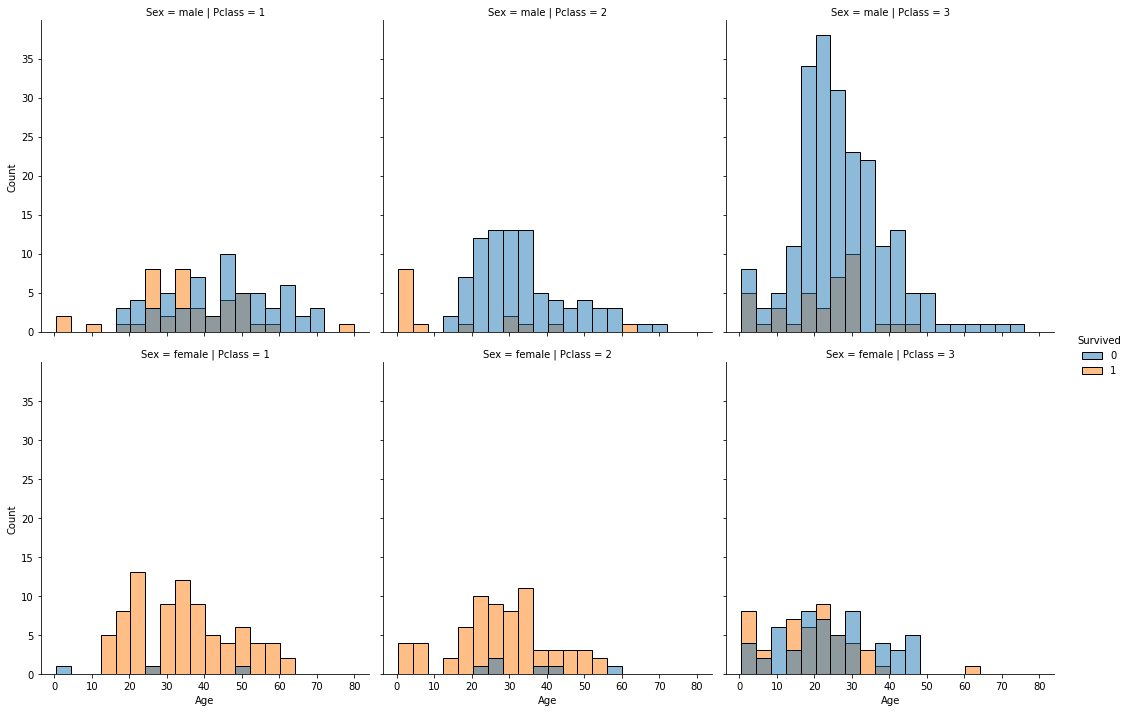

In [6]:
sns.displot(data=df,x='Age',hue='Survived',col='Pclass',row='Sex')

In [7]:
# Female class 1 survival rate
len(df[(df['Sex']=='female') & (df['Pclass']==1) & (df['Survived']==1)]) / len(df[(df['Sex']=='female') & (df['Pclass']==1)])*100

96.80851063829788

In [8]:
# Female class 2 survival rate
len(df[(df['Sex']=='female') & (df['Pclass']==2) & (df['Survived']==1)]) / len(df[(df['Sex']=='female') & (df['Pclass']==2)])*100

92.10526315789474

In [331]:
# Female class 3 survival rate
len(df[(df['Sex']=='female') & (df['Pclass']==3) & (df['Survived']==1)]) / len(df[(df['Sex']=='female') & (df['Pclass']==3)])*100

50.0

In [332]:
# Male class 1 survival rate
len(df[(df['Sex']=='male') & (df['Pclass']==1) & (df['Survived']==1)]) / len(df[(df['Sex']=='male') & (df['Pclass']==1)])*100

36.885245901639344

In [333]:
# Male class 2 survival rate
len(df[(df['Sex']=='male') & (df['Pclass']==2) & (df['Survived']==1)]) / len(df[(df['Sex']=='male') & (df['Pclass']==2)])*100

15.74074074074074

In [334]:
# Male class 3 survival rate
len(df[(df['Sex']=='male') & (df['Pclass']==3) & (df['Survived']==1)]) / len(df[(df['Sex']=='male') & (df['Pclass']==3)])*100

13.544668587896252

1st and 2nd class females had a very high survival chance, compared to 3rd class females who had ~50% chance

Males had much lower survival chance than females, with only 39% of 1st class men surviving and 15% 2nd and 3rd class men surviving.

Generally thought that children were prioritised for lifeboats. Can be seen in Male class 1 and 2 but not in class 3. Not seen in females as most females survived anyhow. 

In [71]:
# 2 year old female in class 1 sadly perished, which was 'unlikely'
pd.concat([df[(df['Age']<10) & (df['Sex']=='female') & (df['Pclass']==1)],
           df[(df['Age']>60) & (df['Sex']=='female') & (df['Pclass']==3)],
          df[(df['Age']>75) & (df['Sex']=='male') & (df['Pclass']==1)],
          df[(df['Age']>60) & (df['Sex']=='male') & (df['Pclass']==2) & (df['Survived']==1)]])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

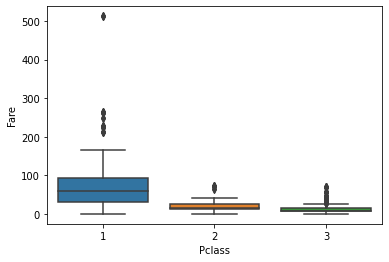

In [339]:
sns.boxplot(data=df,x='Pclass',y='Fare')

In [340]:
# Very rich passengers!
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<AxesSubplot:xlabel='Embarked', ylabel='count'>

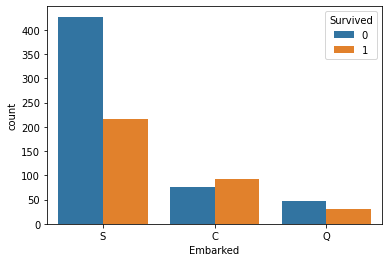

In [341]:
# Most people embarked at Southampton and Queenstown perished whilst most embarked at Cherbourg survived. Likely due to class of passengers embarking at each port
sns.countplot(data=df,x='Embarked',hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

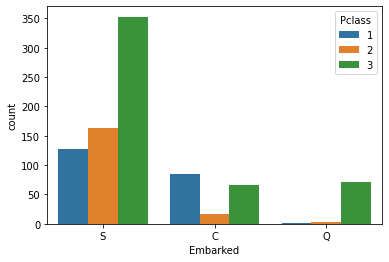

In [342]:
# Confirms theory of more first class passengers embarking in Cherbourg
sns.countplot(data=df,x='Embarked',hue='Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

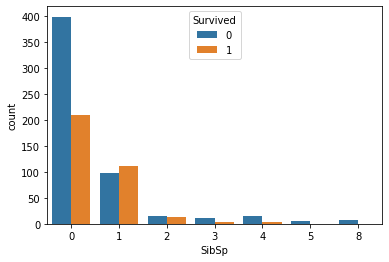

In [343]:
# Passengers with 1 sibling/spouse had highest chance of surviving than perishing.
sns.countplot(data=df,x='SibSp',hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

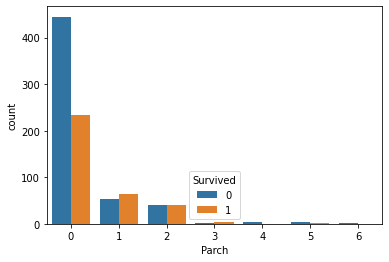

In [344]:
# Passengers with 1-3 parents/children had higher chance of surviving than perishing.
sns.countplot(data=df,x='Parch',hue='Survived')

Impute missing data

In [5]:
df_train = df

In [6]:
df_train_survived = df_train['Survived']

In [7]:
#df_train = df_train.drop(['Survived'],axis=1)

In [8]:
df = pd.concat([df_train,df_test],ignore_index=True)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
df['honorific'] = df['Name'].str.split(',').str[-1].str.split('.').str[0]

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


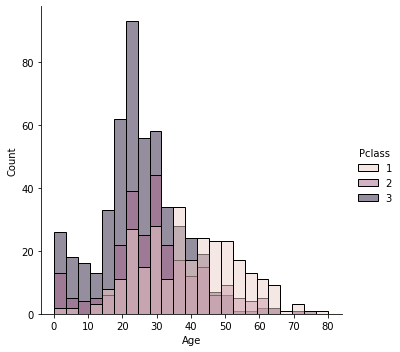

In [13]:
sns.displot(data=df,x='Age',hue='Pclass',)

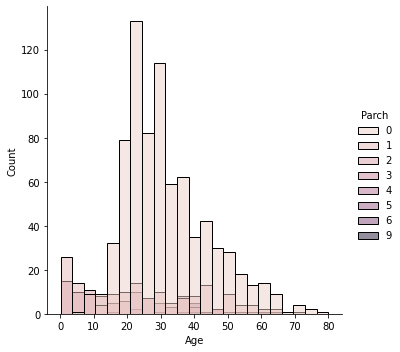

In [14]:
sns.displot(data=df,x='Age',hue='Parch')

In [15]:
# Expect age to be inferred firstly through honorific, then by Pclass (graph above shows Pclass has distinct seperation with age) then by Parch
df['Age'] = df.groupby(['honorific','Pclass','Parch'])['Age'].transform(lambda val: val.fillna(val.mean()))

In [16]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms
1233,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,Mr
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,Mrs


In [17]:
# Don't group by Parch to reduce unique rows
df['Age'] = df.groupby(['honorific','Pclass'])['Age'].transform(lambda val: val.fillna(val.mean()))

In [18]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms


In [19]:
# Don't group by SibSp to reduce unique rows
df['Age'] = df.groupby(['honorific'])['Age'].transform(lambda val: val.fillna(val.mean()))

In [20]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific


In [21]:
df['honorific'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Dr                8
 Rev               8
 Col               4
 Mlle              2
 Ms                2
 Major             2
 Sir               1
 Mme               1
 the Countess      1
 Jonkheer          1
 Don               1
 Dona              1
 Lady              1
 Capt              1
Name: honorific, dtype: int64

In [22]:
pd.concat([df[df['honorific']==' the Countess'],df[df['honorific']==' Jonkheer']])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,the Countess
822,823,0.0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,Jonkheer


In [23]:
df[df['honorific']==' Jonkheer']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
822,823,0.0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,Jonkheer


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  honorific    1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [25]:
df['Fare'] = df.groupby(['Pclass'])['Fare'].transform(lambda val: val.fillna(val.mean()))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  honorific    1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [27]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [28]:
df['Embarked'] = df.groupby(['Pclass'])['Embarked'].transform(lambda x:x.fillna(x.value_counts().index[0]))

In [29]:
df.iloc[[61,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,Mrs


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  honorific    1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


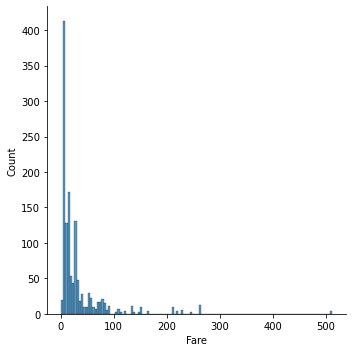

In [32]:
# Check to see if Fare has skewness and wide range which will affect model.
sns.displot(data=df,x='Fare')

In [33]:
# Calculate quantiles for adaptive binning of fare column
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['Fare'].quantile(quantile_list)
quantiles

0.00      0.0000
0.25      7.8958
0.50     14.4542
0.75     31.2750
1.00    512.3292
Name: Fare, dtype: float64

Text(0, 0.5, 'Frequency')

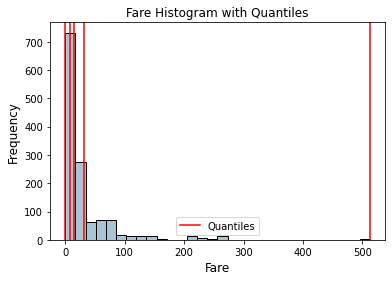

In [34]:
fig, ax = plt.subplots()
df['Fare'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Fare Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('Fare', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [35]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
#df['Fare_quantile_range'] = pd.qcut(df['Fare'], q=quantile_list)
df['Fare_quantile_label'] = pd.qcut(df['Fare'], q=quantile_list, labels=quantile_labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific,Fare_quantile_label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0-25Q
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,75-100Q
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,25-50Q
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,75-100Q
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,25-50Q


In [36]:
df['Fsize'] = 1 + df['Parch'] + df['SibSp']

In [37]:
df['IsAlone']  = 0
df.loc[df.Fsize == 1, 'IsAlone'] = 1

In [38]:
df.loc[df['Ticket']=='PC 17599','Name']

1       Cumings, Mrs. John Bradley (Florence Briggs Th...
1125                            Cumings, Mr. John Bradley
Name: Name, dtype: object

In [39]:
duplicates = []

for uniq in df['Ticket'].unique():
    temp = df.loc[df['Ticket'] == uniq, 'Name']
    if temp.count() > 1:
        duplicates.append(df.loc[df['Ticket'] == uniq, ['Name', 'Ticket', 'Fare', 'Survived','Fsize']])
duplicates = pd.concat(duplicates)
duplicates.head(20)

,Name,Ticket,Fare,Survived,Fsize
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,1.0,2
1125,"Cumings, Mr. John Bradley",PC 17599,71.2833,NaN,2
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,1.0,2
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,0.0,2
6,"McCarthy, Mr. Timothy J",17463,51.8625,0.0,1
1037,"Hilliard, Mr. Herbert Henry",17463,51.8625,NaN,1
7,"Palsson, Master. Gosta Leonard",349909,21.0750,0.0,5
24,"Palsson, Miss. Torborg Danira",349909,21.0750,0.0,5
374,"Palsson, Miss. Stina Viola",349909,21.0750,0.0,5
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,0.0,5


In [40]:
df_friend = duplicates.loc[(duplicates.Fsize == 1) & (duplicates.Survived.notnull())]
df_family = duplicates.loc[(duplicates.Fsize > 1) & (duplicates.Survived.notnull())]
display(df_friend.head(), df_family.head())

,Name,Ticket,Fare,Survived,Fsize
6,"McCarthy, Mr. Timothy J",17463,51.8625,0.0,1
20,"Fynney, Mr. Joseph J",239865,26.0000,0.0,1
791,"Gaskell, Mr. Alfred",239865,26.0000,0.0,1
195,"Lurette, Miss. Elise",PC 17569,146.5208,1.0,1
681,"Hassab, Mr. Hammad",PC 17572,76.7292,1.0,1


,Name,Ticket,Fare,Survived,Fsize
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,1.0,2
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,1.0,2
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,0.0,2
7,"Palsson, Master. Gosta Leonard",349909,21.0750,0.0,5
24,"Palsson, Miss. Torborg Danira",349909,21.0750,0.0,5


In [41]:
print('Passengers taking the same ticket: ', duplicates['Name'].count())
print('Family: ', df_family['Name'].count())
print('Friend: ', df_friend['Name'].count())
print('Other: ', duplicates['Name'].count() - df_family['Name'].count() - df_friend['Name'].count())

Passengers taking the same ticket:  596
Family:  321
Friend:  89
Other:  186


In [42]:
# calculates if any of the passengers travelling under the same ticket survived/perished and adds a column to represent this

df['Connected_Survivor'] = 0.5

for ticket_num, df_grp in df.groupby('Ticket'):
    if len(df_grp) > 1: # We just want the data with duplicated tickets
            for index, row in df_grp.iterrows():
                smax = df_grp.drop(index).Survived.max()
                smin = df_grp.drop(index).Survived.min()
                pid = row.PassengerId
                if smax == 1.0:
                    df.loc[df['PassengerId'] == pid, 'Connected_Survivor'] = 1
                elif smin == 0.0:
                    df.loc[df['PassengerId'] == pid, 'Connected_Survivor'] = 0

In [43]:
df['Connected_Survivor'].value_counts()

0.5    813
1.0    294
0.0    202
Name: Connected_Survivor, dtype: int64

In [44]:
df = pd.get_dummies(df.drop(['PassengerId','Name','Ticket','Cabin','honorific','Fare'],axis=1),drop_first=True)

In [45]:
df.corr()['Survived'].sort_values()

Sex_male                      -0.543351
Pclass                        -0.338481
IsAlone                       -0.203367
Embarked_S                    -0.149683
Fare_quantile_label_25-50Q    -0.095648
Age                           -0.059316
SibSp                         -0.035322
Embarked_Q                     0.003650
Fsize                          0.016639
Fare_quantile_label_50-75Q     0.069189
Parch                          0.081629
Fare_quantile_label_75-100Q    0.250670
Connected_Survivor             0.343614
Survived                       1.000000
Name: Survived, dtype: float64

In [46]:
df = df.drop(['Parch','Fsize','SibSp'],axis=1)

In [47]:
df.head()

,Survived,Pclass,Age,IsAlone,Connected_Survivor,Sex_male,Embarked_Q,Embarked_S,Fare_quantile_label_25-50Q,Fare_quantile_label_50-75Q,Fare_quantile_label_75-100Q
0,0.0,3,22.0,0,0.5,1,0,1,0,0,0
1,1.0,1,38.0,0,0.5,0,0,0,0,0,1
2,1.0,3,26.0,1,0.5,0,0,1,1,0,0
3,1.0,1,35.0,0,0.0,0,0,1,0,0,1
4,0.0,3,35.0,1,0.5,1,0,1,1,0,0


Train supervised learning model

Split columns back intro train and test sets. 

As a first pass, include passengers (rows) with imputated age BUT on second pass try training with dropping passengers with NaN age to see if accuracy score is improved.

Drop columns which aren't useful for a supervised learning classification model.

In [55]:
df = df.drop(['Survived'],axis=1)

In [49]:
#df = pd.get_dummies(df.drop(['PassengerId','Name','Ticket','Cabin','honorific'],axis=1),drop_first=True)

KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin' 'honorific'] not found in axis"

In [56]:
df.head()

,Pclass,Age,IsAlone,Connected_Survivor,Sex_male,Embarked_Q,Embarked_S,Fare_quantile_label_25-50Q,Fare_quantile_label_50-75Q,Fare_quantile_label_75-100Q
0,3,22.0,0,0.5,1,0,1,0,0,0
1,1,38.0,0,0.5,0,0,0,0,0,1
2,3,26.0,1,0.5,0,0,1,1,0,0
3,1,35.0,0,0.0,0,0,1,0,0,1
4,3,35.0,1,0.5,1,0,1,1,0,0


In [58]:
#df.loc[:809,'Survived']

In [59]:
X_train = df.loc[:890]
X_test = df.loc[891:]

In [60]:
y_train = df_train_survived

From sci-kit learn 'choosing the right estimator' flowchart (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), linearSVC is chosen as estimator

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [43]:
scaled_X_train

array([[-0.78927234,  0.82737724, -0.55280199, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [ 1.2669898 , -1.56610693,  0.63049094, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 1.2669898 ,  0.82737724, -0.25697876, ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [-0.78927234,  0.82737724, -1.43953212, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [ 1.2669898 , -1.56610693, -0.25697876, ...,  0.73769513,
        -0.30756234, -1.62380254],
       [-0.78927234,  0.82737724,  0.18675609, ...,  0.73769513,
         3.25137334, -1.62380254]])

In [408]:
from sklearn.svm import SVC

In [409]:
svc = SVC(class_weight='balanced')

In [410]:
from sklearn.model_selection import GridSearchCV

In [411]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'gamma':['scale','auto'],
              'kernel':['linear','rbf']}
grid = GridSearchCV(svc,param_grid)

In [412]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [413]:
grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [416]:
preds = grid.predict(scaled_X_test)

In [417]:
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Trying without imputing ages:

In [468]:
df_train = pd.read_csv('train.csv')

In [469]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [470]:
df_train = df_train.dropna(subset=['Age','Embarked'])

In [471]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [472]:
y_train = df_train['Survived']
X_train = df_train.drop(['PassengerId','Name','Cabin','Ticket','Survived'],axis=1)

In [473]:
X_train = pd.get_dummies(X_train,drop_first=True)

In [179]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,8.232222,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [475]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [476]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [477]:
grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [511]:
preds = grid.predict(scaled_X_test)

In [512]:
submission = pd.DataFrame(data=[np.arange(892,1310),preds]).transpose()

In [513]:
submission.columns=['PassengerId','Survived']

In [515]:
submission.to_csv('attempt_2.csv',index=False)

Try K-nearest neighbours, random forests, boosted trees

K-nearest neighbours

Re-run data imputation cells used for first SVC classification attempt

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [196]:
scaler = StandardScaler()

In [197]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [198]:
y_train = df_train_survived

In [199]:
knn = KNeighborsClassifier()

In [67]:
from sklearn.model_selection import GridSearchCV

In [201]:
k_values = list(range(1,30))

In [202]:
param_grid = {'n_neighbors': k_values}

In [203]:
grid = GridSearchCV(knn,param_grid)

In [204]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [205]:
grid.best_params_

{'n_neighbors': 8}

In [206]:
preds = grid.predict(scaled_X_test)

In [209]:
create_submission(preds,11)

Random Forests:

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
#help(RandomForestClassifier)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
n_estimators = [200]
min_samples_split = [10, 20, 30, 40]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [65]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
              'min_samples_split':min_samples_split,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [68]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid,cv=10)

In [62]:
#X_train = df.loc[:890]
#X_test = df.loc[891:]

In [63]:
#y_train = df_train_survived

In [69]:
grid.fit(X_train,y_train)

C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda

C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda

C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda

C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda

C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda

C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josh-\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josh-\anaconda

C:\Users\josh-\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82717853 0.83167291 0.82941323 0.83278402 0.82714107 0.82716604
 0.82828964 0.83389513 0.82831461 0.82380774 0.83725343 0.82940075
 0.83275905 0.82600499 0.83274657 0.82937578 0.83167291 0.82830212
 0.83277154 0.83950062 0.82938826 0.83275905 0.83273408 0.83273408
        nan 0.81034956        nan 0.82717853        nan 0.82828964
        nan 0.83166042        nan 0.81595506        nan 0.82940075
        nan 0.83390762        nan 0.82826467        nan 0.81817728
        nan 0.83278402        nan 0.83500624        nan 0.83387016]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'min_samples_split': [10, 20, 30, 40],
                         'n_estimators': [200], 'oob_score': [True, False]})

In [70]:
grid.best_params_

{'bootstrap': True,
 'max_features': 4,
 'min_samples_split': 20,
 'n_estimators': 200,
 'oob_score': False}

In [74]:
grid.best_score_

0.8395006242197253

In [83]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1]:
feature_importance = pd.DataFrame(grid.best_estimator_.feature_importances_.reshape([1,10]),columns=X_train.columns)
feature_importance

NameError: name 'pd' is not defined

<AxesSubplot:>

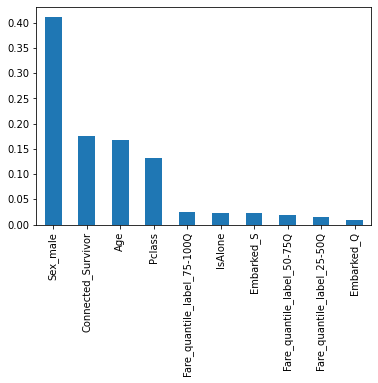

In [92]:
feat_importances = pd.Series(grid.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar')

In [66]:
preds = grid.predict(X_test)

In [68]:
def create_submission(preds,number):
    submission = pd.DataFrame(data=[np.arange(892,1310),preds]).transpose()
    submission.columns=['PassengerId','Survived']
    submission.to_csv(f'attempt_{number}.csv',index=False)

In [69]:
create_submission(preds,13)

In [180]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,8.232222,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
model = AdaBoostClassifier(n_estimators=200)

In [73]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200)

In [74]:
preds = model.predict(X_test)

In [75]:
create_submission(preds,14)